# 회귀(Regression)

지도 학습(Supervised Learning)으로 예측할 Target이 연속형(continuous) 데이터(float)인 경우

## 회귀의 주요 평가 지표
예측값과 실제 값간의 차이를 구한다

- ### MSE (Mean Squared Error)
    - 실제 값과 예측값의 차를 제곱해 평균 낸 것
    - mean_squared_error() -> 낮을수록 좋다.
    - 'neg_mean_squared_error' -> 높을 수록 좋다.
    $$
    MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2\\
    y_i: 실제값, \hat{y_i}: 모델이 예측한 값
    $$
    
- ### RMSE (Root Mean Squared Error)
    - MSE는 오차의 제곱한 값이므로 실제 오차의 평균보다 큰 값이 나온다.  MSE의 제곱근이 RMSE이다.
    - scikit-learn은 함수를 지원하지 않는다. (MSE를 구한 뒤 np.sqrt()로 제곱근을 구한다.)
    $$
    RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2}
    $$

- ### $R^2$ (R square, 결정계수)
    - __모델로 예측한 오차제곱합 / 평균으로 예측한 오차제곱합__ => 즉, 평균예측보다 내 모델이 더 잘했나, 못했나?
    - 평균으로 예측했을 때 오차(총오차) 보다 모델을 사용했을 때 얼마 만큼 더 좋은 성능을 내는지를 비율로 나타낸 값. 
    - __1에 가까울 수록 좋은 모델.__
    - r2_score()
    - 'r2'
    - [참고](https://ko.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/assessing-the-fit-in-least-squares-regression/a/r-squared-intuition)
    $$
    R^2 = \cfrac{\sum_{i=1}^{n}(\hat{y_i}-\bar{y})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
    $$

- $y_i$ : i번째 실제 값, 
- $\hat{y_i}$ : i 번째 예측 값, 
- $\bar{y}$ : y의 평균    



In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [9]:
# 회귀문제에 사용할 수 있는 가상의 데이터셋을 생성하는 함수(make_xxxx())
X, y = make_regression(n_samples=100,  # 데이터 개수
                       n_features=1,  # feature 개수
                       n_informative=1,  # target(label)에 영향을 주는 feature의 개수: 1개 외의 feature는 target과 상관 없다는 뜻
                       noise=30,  # 모델이 찾을 수 없는 값의 범위
                       random_state=0
                      )
X.shape, y.shape

((100, 1), (100,))

In [10]:
X[:5]

array([[-0.35955316],
       [ 0.97663904],
       [ 0.40234164],
       [-0.81314628],
       [-0.88778575]])

In [11]:
y[:5]

array([-29.38797228, -18.77135911,   0.56377656,  19.90502386,
       -31.84342122])

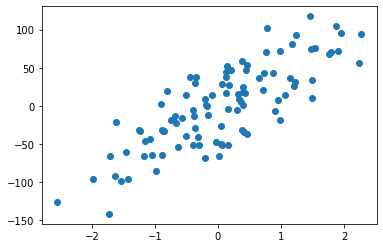

In [12]:
plt.scatter(X,y)
plt.show()

In [13]:
np.mean(y), np.min(y), np.max(y), np.median(y)

(0.1344193000112442,
 -141.9934839876259,
 117.54737632470687,
 1.2075194195120451)

In [14]:
lr = LinearRegression()
lr.fit(X, y)  # w, b를 찾았을 것.

LinearRegression()

In [23]:
pred = lr.predict(X)

In [24]:
pred[:5]

array([-17.93471365,  39.63817528,  14.89326194, -37.47880796,
       -40.6948196 ])

In [25]:
y[:5]

array([-29.38797228, -18.77135911,   0.56377656,  19.90502386,
       -31.84342122])

In [26]:
new_X = [[0.56],[1.2],[-0.7]]  # 이 새로운 X에 대해서 lr모델은 y값을 어떻게 예측할까?
lr.predict(new_X)

array([ 21.68633197,  49.26219191, -32.60364229])

In [29]:
# 모델 평가
# MSE, RMSE, R2
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, pred)
print(f"MSE: {mse}, RMSE: {rmse}, R2: {r2}")

MSE: 1027.5433755137535, RMSE: 32.055317429620835, R2: 0.6473091780922585


--> RMSE의 경우, make_regression 데이터 셋의 noise와 비슷한 것을 확인할 수 있다.

In [39]:
lr2 = LinearRegression()
score_list = cross_val_score(lr2,
                             X, y,
                             cv = 3,  # 폴드 개수
                             scoring="r2",  # 생략하면  분류: accuracy, 회귀: R^2
                            )

In [40]:
score_list

array([0.57447588, 0.58987265, 0.55276667])

-> 각 폴드를 test로 봤을 때 r2값

In [32]:
print(score_list)
print(np.mean(score_list))

[0.57447588 0.58987265 0.55276667]
0.5723717334851716


In [34]:
score_list = cross_val_score(lr,
                             X, y,
                             cv=3,
                             scoring="neg_mean_squared_error"
                            )

In [35]:
print(score_list)
np.mean(score_list)

[-1307.38952617 -1332.84952275  -859.62106567]


-1166.6200381987528

In [36]:
print(score_list*-1)
np.mean(score_list*-1)

[1307.38952617 1332.84952275  859.62106567]


1166.6200381987528

In [38]:
print(np.sqrt(score_list*-1))
np.sqrt(np.mean(score_list*-1))

[36.15784184 36.50821172 29.31929511]


34.155819975499824

In [41]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [43]:
# LR.coef_ : feature별 가중치, LR.intercept_ : bias 반환
print(lr.coef_)  # feature가 1개라 1개만 나옴.
print(lr.intercept_)

[43.08728116]
-2.442545481092178


In [45]:
def my_pred(X):
    return lr.coef_[0] * X + lr.intercept_

In [46]:
new_X = np.array(new_X)
my_pred(new_X)

array([[ 21.68633197],
       [ 49.26219191],
       [-32.60364229]])

In [47]:
lr.predict(new_X)

array([ 21.68633197,  49.26219191, -32.60364229])

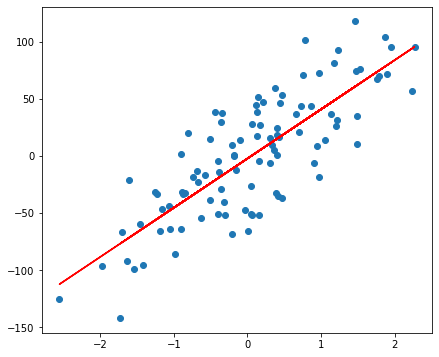

In [50]:
plt.figure(figsize=(7,6))
plt.scatter(X, y)
y_hat = my_pred(X)
plt.plot(X, y_hat, color='red')  # 회귀선

plt.show()

## 기존 분류 모델의 회귀 모델

In [51]:
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.svm import SVR

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)   # stratify는 의미가 없다.

In [56]:
knn = KNeighborsRegressor()
tree = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
svr = SVR()

est = [
    ("knn", knn),
    ("tree", tree),
    ("rf", rf),
    ("GB", gb),
    ("svr", svr)
]

In [57]:
def print_regression_metrics(y, pred, title=None):
    mse = mean_squared_error(y, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, pred)
    if title:
        print(title)
    print(f"MSE: {mse}, RMSE: {rmse}, R Squered: {r2}")

In [59]:
for model_name, model in est:
    # 학습
    model.fit(X_train, y_train)
    # 평가
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    print_regression_metrics(y_train, pred_train, title=f'\n\n{model_name} - Train')
    print_regression_metrics(y_test, pred_test, title=f'{model_name} - Test')
    



knn - Train
MSE: 848.1395842397269, RMSE: 29.12283612974064, R Squered: 0.7239989948587914
knn - Test
MSE: 1181.4263196957993, RMSE: 34.371882690591725, R Squered: 0.47404777230081696


tree - Train
MSE: 0.0, RMSE: 0.0, R Squered: 1.0
tree - Test
MSE: 1774.249296708706, RMSE: 42.12183871471788, R Squered: 0.21013240136893951


rf - Train
MSE: 223.8381102338977, RMSE: 14.961220212064847, R Squered: 0.9271587548070361
rf - Test
MSE: 1399.694548734451, RMSE: 37.412491880847114, R Squered: 0.376878224454284


GB - Train
MSE: 158.09406068470207, RMSE: 12.573546066432575, R Squered: 0.9485531385792508
GB - Test
MSE: 1377.898258279898, RMSE: 37.120051970328625, R Squered: 0.3865815866775857


svr - Train
MSE: 2351.4063767585512, RMSE: 48.49130207324352, R Squered: 0.23480694034276983
svr - Test
MSE: 1629.5501050987923, RMSE: 40.36768639764722, R Squered: 0.2745501825752198


tree의 경우, train을 예측할 때 완전히 나눠질 때 까지 분류함. 따라서 오차가 0으로 나옴. 하지만 test셋은 잘 맞추지 못한다.

In [71]:
vote = VotingRegressor(est)
vote.fit(X_train, y_train)
print_regression_metrics(y_train, vote.predict(X_train), title="Voting Train")
print_regression_metrics(y_test, vote.predict(X_test), title="Voting Test")


Voting Train
MSE: 361.4287067291672, RMSE: 19.011278408596493, R Squered: 0.8823841167211204
Voting Test
MSE: 1183.372328262317, RMSE: 34.40017918939256, R Squered: 0.4731814402040805


In [72]:
tree = DecisionTreeRegressor(max_depth=3)  # None으로 주면 MSE가 0이 될때까지 분류한다.
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [73]:
from sklearn.tree import export_graphviz
from graphviz import Source
graph = Source(export_graphviz(tree, out_file=None, rounded=True, filled=True))

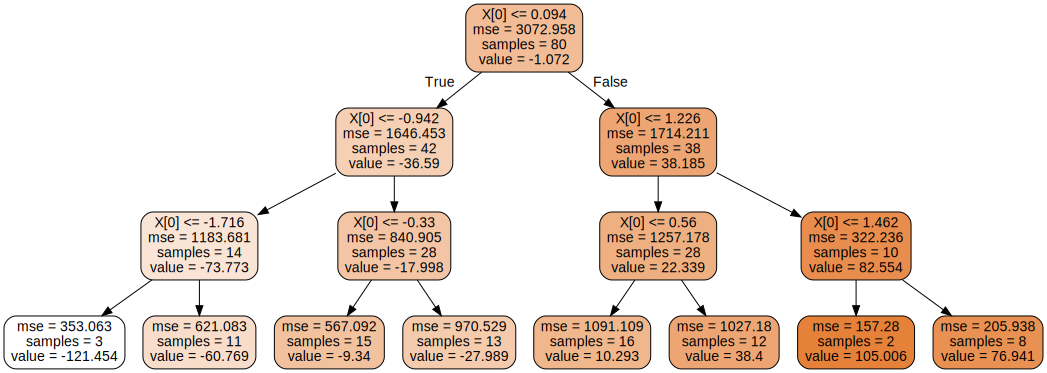

In [74]:
graph